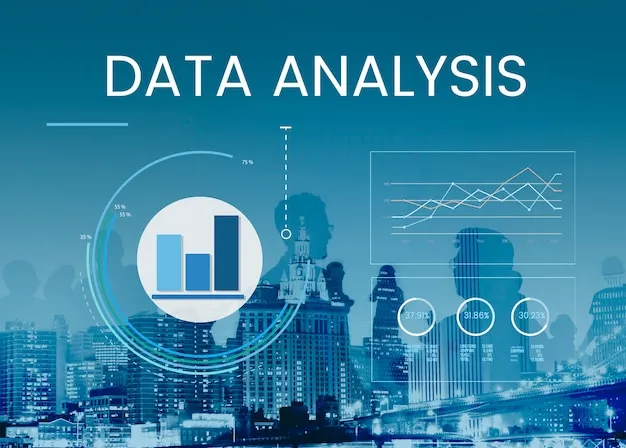

# **Proyecto_ML_Modelo_Predictivo_Cáncer** #

**Descripción del proyecto**

Este proyecto tiene como objetivo desarrollar un modelo de Machine Learning capaz de predecir si un paciente tiene cáncer basándose en datos clínicos y demográficos. Para ello, se han utilizado tres datasets distintos que contienen información relevante sobre los pacientes. El modelo busca proporcionar una herramienta de apoyo para la detección temprana del cáncer, mejorando así la toma de decisiones médicas.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import joblib
import os

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

### **Dataset 1: Hábitos de vida y factores de Riesgo.** ###

**1. Exploración de los datos.**

Este pequeño dataset he querido incluirlo por la sencillez a la hora de correlacionar diferentes factores de riesgo con habitos de vida. Posteriormente trabajaremos con Datasets más complejos y con muchas más instancias.

In [3]:
df = pd.read_csv(r'C:\BOOTCAMP_DATA_SCIENCE\Proyecto ML_CancerPredictionModel\ML_Cancer_Prediction_Models\src\data_sample\cancer patient data sets.csv')

df.set_index('index', inplace=True)

df.head(1)

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low


- Transformación de columnas para comprensión de la información y primera revisión de los datos. 

In [4]:
# Cambiar los nombres de las columnas a español
df.columns = [
    "ID del Paciente", "Edad", "Género", "Contaminación del Aire", 
    "Consumo de Alcohol", "Alergia al Polvo", "Riesgos Ocupacionales", 
    "Riesgo Genético", "Enfermedad Pulmonar Crónica", "Dieta Balanceada", 
    "Obesidad", "Fumar", "Fumador Pasivo", "Dolor de Pecho", 
    "Tos con Sangre", "Fatiga", "Pérdida de Peso", "Dificultad para Respirar", 
    "Sibilancias", "Dificultad para Tragar", "Acropaquia", "Resfriados Frecuentes", 
    "Tos Seca", "Ronquidos", "Nivel"
]

df.head()

,ID del Paciente,Edad,Género,Contaminación del Aire,Consumo de Alcohol,Alergia al Polvo,Riesgos Ocupacionales,Riesgo Genético,Enfermedad Pulmonar Crónica,Dieta Balanceada,Obesidad,Fumar,Fumador Pasivo,Dolor de Pecho,Tos con Sangre,Fatiga,Pérdida de Peso,Dificultad para Respirar,Sibilancias,Dificultad para Tragar,Acropaquia,Resfriados Frecuentes,Tos Seca,Ronquidos,Nivel
index,,,,,,,,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID del Paciente              1000 non-null   object
 1   Edad                         1000 non-null   int64 
 2   Género                       1000 non-null   int64 
 3   Contaminación del Aire       1000 non-null   int64 
 4   Consumo de Alcohol           1000 non-null   int64 
 5   Alergia al Polvo             1000 non-null   int64 
 6   Riesgos Ocupacionales        1000 non-null   int64 
 7   Riesgo Genético              1000 non-null   int64 
 8   Enfermedad Pulmonar Crónica  1000 non-null   int64 
 9   Dieta Balanceada             1000 non-null   int64 
 10  Obesidad                     1000 non-null   int64 
 11  Fumar                        1000 non-null   int64 
 12  Fumador Pasivo               1000 non-null   int64 
 13  Dolor de Pecho               1000 non-n

In [6]:
df.describe()

,Edad,Género,Contaminación del Aire,Consumo de Alcohol,Alergia al Polvo,Riesgos Ocupacionales,Riesgo Genético,Enfermedad Pulmonar Crónica,Dieta Balanceada,Obesidad,Fumar,Fumador Pasivo,Dolor de Pecho,Tos con Sangre,Fatiga,Pérdida de Peso,Dificultad para Respirar,Sibilancias,Dificultad para Tragar,Acropaquia,Resfriados Frecuentes,Tos Seca,Ronquidos
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,3.948000,4.195000,4.438000,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,2.495902,2.311778,2.280209,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,9.000000,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [7]:
df_es = df.copy()

def describe_df(df):
    # Creamons un diccionario para almacenar la información
    data = {
        'DATA_TYPE': df.dtypes,
        'MISSINGS(%)': df.isnull().mean() * 100,
        'UNIQUE_VALUES': df.nunique(),
        'CARDIN(%)': df.nunique() / len(df) * 100
    }
    # Creamos un nuevo DataFrame con la información recopilada, usamos 'transpose' para cambiar 
    # las filas por columnas.
    pacientes_df = pd.DataFrame(data).transpose()
    
    return pacientes_df

pacientes_df = describe_df(df_es)
pacientes_df

,ID del Paciente,Edad,Género,Contaminación del Aire,Consumo de Alcohol,Alergia al Polvo,Riesgos Ocupacionales,Riesgo Genético,Enfermedad Pulmonar Crónica,Dieta Balanceada,Obesidad,Fumar,Fumador Pasivo,Dolor de Pecho,Tos con Sangre,Fatiga,Pérdida de Peso,Dificultad para Respirar,Sibilancias,Dificultad para Tragar,Acropaquia,Resfriados Frecuentes,Tos Seca,Ronquidos,Nivel
DATA_TYPE,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object
MISSINGS(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,1000,40,2,8,8,8,8,7,7,7,7,8,8,9,9,8,8,8,8,8,9,7,7,7,3
CARDIN(%),100.0,4.0,0.2,0.8,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.8,0.8,0.9,0.9,0.8,0.8,0.8,0.8,0.8,0.9,0.7,0.7,0.7,0.3


- Para EDA y revisión gráfica del DF, recomiendo visualizar en la carpeta de imágenes todos los gráficos, y si desean ver el proceso de obtención, pueden visualizarlo en el notebook_pruebas.

**2. Preparació de Dataset para su entrenamiento posterior.**

In [8]:
df1 = df.copy()

# 2. Codificar las variables categóricas
# Convertir la columna objetivo 'Nivel' en valores numéricos
df1['Nivel'] = df1['Nivel'].map({'Low': 0, 'Medium': 1, 'High': 2})

# 3. Dividir en variables predictoras (X) y variable objetivo (y).
X = df1.drop(columns=['ID del Paciente', 'Nivel'])
y = df1['Nivel']

In [9]:
# Verificar la distribución de la columna objetivo
print("Distribución de la columna objetivo (y) en %:")
print(y.value_counts(normalize=True)*100)  # Proporción de cada clase

Distribución de la columna objetivo (y) en %:
Nivel
2    36.5
1    33.2
0    30.3
Name: proportion, dtype: float64


In [10]:
# 4. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

(800, 23)

In [11]:
y_train.shape

(800,)

### **RandomForestClassifier** ##

In [12]:
# 1. Crear el modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)

# 2. Entrenar el modelo con los datos de entrenamiento
modelo_rf.fit(X_train, y_train)

# 3. Hacer predicciones en el conjunto de prueba
y_pred_rf = modelo_rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        55
           1       0.90      0.98      0.94        63
           2       0.96      0.99      0.98        82

    accuracy                           0.95       200
   macro avg       0.95      0.94      0.95       200
weighted avg       0.95      0.95      0.95       200



In [40]:
# Construir una ruta relativa para guardar el modelo
ruta_modelo = os.path.join('src', 'models', 'modelo_rf.pkl')

# Crear la carpeta 'src/models' si no existe
os.makedirs(os.path.dirname(ruta_modelo), exist_ok=True)

# Guardar el modelo
joblib.dump(modelo_rf, ruta_modelo)

print(f"Modelo guardado en: {ruta_modelo}")



Modelo guardado en: src\models\modelo_rf.pkl


**3.Conclusión:**

El modelo es realmente bueno, casi podríamos decir que sobreajusta un poco, pero es normal teniendo en cuenta que contamos con muy pocas instancias.



### **Dataset 2: Exposición a contaminación y ensayos clínicos.** ###

**1. Exploración de los datos.**

Este Dataset ya es mucho más completo y las variables tienen una correlación mas compleja entre ellas. Es necesario un modelo de ML optimizado, que nos permita una predicción con error ajustado e intentar no gastar muchos recursos tanto en tiempo como en equipo.

In [13]:
df_lung = pd.read_csv(r'C:\BOOTCAMP_DATA_SCIENCE\Proyecto ML_CancerPredictionModel\ML_Cancer_Prediction_Models\src\data_sample\lung_cancer_prediction_dataset.csv')

df_lung.set_index('ID', inplace=True)

df_lung.head()

,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Lung_Cancer_Diagnosis,Cancer_Stage,Survival_Years,Adenocarcinoma_Type,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
ID,,,,,,,,,,,,,,,,,,,,,,,
0,China,1400,80,Male,Yes,30,29,No,No,No,NaN,0,Yes,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,Iran,84,53,Male,No,0,0,Yes,No,No,NaN,0,Yes,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,Mexico,128,47,Male,Yes,12,6,Yes,No,No,NaN,0,Yes,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,Indonesia,273,39,Female,No,0,0,No,Yes,No,NaN,0,Yes,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,South Africa,59,44,Female,No,0,0,Yes,No,No,NaN,0,Yes,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0


In [14]:
# Diccionario con las traducciones de las columnas
traducciones = {
    "Country": "País",
    "Population_Size": "Tamaño_Población",
    "Age": "Edad",
    "Gender": "Género",
    "Smoker": "Fumador",
    "Years_of_Smoking": "Años_Fumando",
    "Cigarettes_per_Day": "Cigarrillos_por_Día",
    "Passive_Smoker": "Fumador_Pasivo",
    "Family_History": "Historial_Familiar",
    "Lung_Cancer_Diagnosis": "Diagnóstico_Cáncer_Pulmonar",
    "Cancer_Stage": "Etapa_Cáncer",
    "Survival_Years": "Años_Supervivencia",
    "Adenocarcinoma_Type": "Tipo_Adenocarcinoma",
    "Air_Pollution_Exposure": "Exposición_Contaminación_Aire",
    "Occupational_Exposure": "Exposición_Ocupacional",
    "Indoor_Pollution": "Contaminación_Interior",
    "Healthcare_Access": "Acceso_Salud",
    "Early_Detection": "Detección_Temprana",
    "Treatment_Type": "Tipo_Tratamiento",
    "Developed_or_Developing": "Desarrollado_o_En_Desarrollo",
    "Annual_Lung_Cancer_Deaths": "Muertes_Anuales_Cáncer_Pulmonar",
    "Lung_Cancer_Prevalence_Rate": "Tasa_Prevalencia_Cáncer_Pulmonar",
    "Mortality_Rate": "Tasa_Mortalidad"
}

# Renombrar las columnas
df_lung.rename(columns=traducciones, inplace=True)

# Verificar los nuevos nombres de las columnas
df_lung.sample(2)

,País,Tamaño_Población,Edad,Género,Fumador,Años_Fumando,Cigarrillos_por_Día,Fumador_Pasivo,Historial_Familiar,Diagnóstico_Cáncer_Pulmonar,Etapa_Cáncer,Años_Supervivencia,Tipo_Adenocarcinoma,Exposición_Contaminación_Aire,Exposición_Ocupacional,Contaminación_Interior,Acceso_Salud,Detección_Temprana,Tipo_Tratamiento,Desarrollado_o_En_Desarrollo,Muertes_Anuales_Cáncer_Pulmonar,Tasa_Prevalencia_Cáncer_Pulmonar,Tasa_Mortalidad
ID,,,,,,,,,,,,,,,,,,,,,,,
212815,Thailand,70,45,Male,Yes,4,7,No,No,No,NaN,0,No,Low,Yes,No,Poor,No,NaN,Developing,26000,2.15,0.0
9938,Germany,83,71,Male,Yes,24,29,No,Yes,No,NaN,0,No,High,No,No,Good,No,NaN,Developed,45000,1.34,0.0


In [15]:
df_lung.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220632 entries, 0 to 220631
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   País                              220632 non-null  object 
 1   Tamaño_Población                  220632 non-null  int64  
 2   Edad                              220632 non-null  int64  
 3   Género                            220632 non-null  object 
 4   Fumador                           220632 non-null  object 
 5   Años_Fumando                      220632 non-null  int64  
 6   Cigarrillos_por_Día               220632 non-null  int64  
 7   Fumador_Pasivo                    220632 non-null  object 
 8   Historial_Familiar                220632 non-null  object 
 9   Diagnóstico_Cáncer_Pulmonar       220632 non-null  object 
 10  Etapa_Cáncer                      8961 non-null    object 
 11  Años_Supervivencia                220632 non-null  int64 

In [18]:
def clasificar_variables(df_lung, umbral_categoria=10, umbral_discreta=20):

    clasificacion = []

    for col in df_lung.columns:
        unique_values = df_lung[col].nunique()
        dtype = df_lung[col].dtype

        # Clasificación de las variables
        if dtype == 'object' or unique_values <= umbral_categoria:
            tipo_variable = "Categórica"
        elif dtype in ['int64', 'float64'] and unique_values <= umbral_discreta:
            tipo_variable = "Discreta"
        elif dtype in ['int64', 'float64']:
            tipo_variable = "Continua"
        else:
            tipo_variable = "Desconocido"

        # Añadir la información al resultado
        clasificacion.append({"Columna": col, "Tipo de Variable": tipo_variable, "Tipo de Dato": dtype})
    
    return pd.DataFrame(clasificacion)

# Aplicar la función
resultado = clasificar_variables(df_lung)
resultado

,Columna,Tipo de Variable,Tipo de Dato
0,País,Categórica,object
1,Tamaño_Población,Continua,int64
2,Edad,Continua,int64
3,Género,Categórica,object
4,Fumador,Categórica,object
5,Años_Fumando,Continua,int64
6,Cigarrillos_por_Día,Continua,int64
7,Fumador_Pasivo,Categórica,object
8,Historial_Familiar,Categórica,object
9,Diagnóstico_Cáncer_Pulmonar,Categórica,object


In [16]:
def describe_df(df_lung):
    # Creamons un diccionario para almacenar la información
    data = {
        'DATA_TYPE': df_lung.dtypes,
        'MISSINGS(%)': df_lung.isnull().mean() * 100,
        'UNIQUE_VALUES': df_lung.nunique(),
        'CARDIN(%)': df_lung.nunique() / len(df) * 100
    }
    # Creamos un nuevo DataFrame con la información recopilada, usamos 'transpose' para cambiar 
    # las filas por columnas.
    pacientes_df_lung = pd.DataFrame(data).transpose()
    
    return pacientes_df_lung

pacientes_df_lung = describe_df(df_lung)
pacientes_df_lung

,País,Tamaño_Población,Edad,Género,Fumador,Años_Fumando,Cigarrillos_por_Día,Fumador_Pasivo,Historial_Familiar,Diagnóstico_Cáncer_Pulmonar,Etapa_Cáncer,Años_Supervivencia,Tipo_Adenocarcinoma,Exposición_Contaminación_Aire,Exposición_Ocupacional,Contaminación_Interior,Acceso_Salud,Detección_Temprana,Tipo_Tratamiento,Desarrollado_o_En_Desarrollo,Muertes_Anuales_Cáncer_Pulmonar,Tasa_Prevalencia_Cáncer_Pulmonar,Tasa_Mortalidad
DATA_TYPE,object,int64,int64,object,object,int64,int64,object,object,object,object,int64,object,object,object,object,object,object,object,object,int64,float64,float64
MISSINGS(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.938486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.979586,0.0,0.0,0.0,0.0
UNIQUE_VALUES,25,25,66,2,2,41,27,2,2,2,4,11,2,3,2,2,2,2,3,2,8079,201,2849
CARDIN(%),2.5,2.5,6.6,0.2,0.2,4.1,2.7,0.2,0.2,0.2,0.4,1.1,0.2,0.3,0.2,0.2,0.2,0.2,0.3,0.2,807.9,20.1,284.9


**2.Preparación de los datos.**

Eliminamos 2 columnas al faltar o incluir mas de un 90% de 'missings'. No hay suficientes datos como para poder trabajar con ellas. Son las columnas: 'Etapa_Cáncer' y 'Tipo_Tratamiento'.

In [17]:
# Eliminar las columnas 'Tipo_Tratamiento' y 'Etapa_Cáncer'
df_lung = df_lung.drop(columns=['Tipo_Tratamiento', 'Etapa_Cáncer'])

# Verificar que las columnas hayan sido eliminadas
print(df_lung.columns)

Index(['País', 'Tamaño_Población', 'Edad', 'Género', 'Fumador', 'Años_Fumando',
       'Cigarrillos_por_Día', 'Fumador_Pasivo', 'Historial_Familiar',
       'Diagnóstico_Cáncer_Pulmonar', 'Años_Supervivencia',
       'Tipo_Adenocarcinoma', 'Exposición_Contaminación_Aire',
       'Exposición_Ocupacional', 'Contaminación_Interior', 'Acceso_Salud',
       'Detección_Temprana', 'Desarrollado_o_En_Desarrollo',
       'Muertes_Anuales_Cáncer_Pulmonar', 'Tasa_Prevalencia_Cáncer_Pulmonar',
       'Tasa_Mortalidad'],
      dtype='object')


- Para EDA y revisión gráfica del DF, recomiendo visualizar en la carpeta de imágenes todos los gráficos, y si desean ver el proceso de obtención, pueden visualizarlo en el notebook_pruebas.

**3. Preparació de Dataset para su entrenamiento posterior.**

Usaremos un modelo de regresión para predecir la tasa de mortalidad, utilizando la relación de las diferentes instancias respecto a la variable objetivo.

In [20]:
df_lung1 = df_lung.copy()

df_lung1 = pd.get_dummies(df_lung1, drop_first=True)

df_lung1.head()

,Tamaño_Población,Edad,Años_Fumando,Cigarrillos_por_Día,Años_Supervivencia,Muertes_Anuales_Cáncer_Pulmonar,Tasa_Prevalencia_Cáncer_Pulmonar,Tasa_Mortalidad,País_Brazil,País_China,País_DR Congo,País_Egypt,País_Ethiopia,País_France,País_Germany,País_India,País_Indonesia,País_Iran,País_Italy,País_Japan,País_Mexico,País_Myanmar,País_Nigeria,País_Pakistan,País_Philippines,País_Russia,País_South Africa,País_Thailand,País_Turkey,País_UK,País_USA,País_Vietnam,Género_Male,Fumador_Yes,Fumador_Pasivo_Yes,Historial_Familiar_Yes,Diagnóstico_Cáncer_Pulmonar_Yes,Tipo_Adenocarcinoma_Yes,Exposición_Contaminación_Aire_Low,Exposición_Contaminación_Aire_Medium,Exposición_Ocupacional_Yes,Contaminación_Interior_Yes,Acceso_Salud_Poor,Detección_Temprana_Yes,Desarrollado_o_En_Desarrollo_Developing
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1400,80,30,29,0,690000,2.44,0.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,True,False,True,False,True
1,84,53,0,0,0,27000,2.10,0.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,True,False,True,False,True,False,True
2,128,47,12,6,0,28000,1.11,0.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,True,False,True,False,False,True,True,True
3,273,39,0,0,0,40000,0.75,0.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,True,False,True
4,59,44,0,0,0,15000,2.44,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,True,False,True,False,True


In [24]:
X1 = df_lung1.drop(columns=['Tasa_Mortalidad'])
y1 = df_lung1['Tasa_Mortalidad']

In [25]:
X1.shape

(220632, 44)

In [26]:
y1.shape

(220632,)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

- Para evitar largos tiempos de espera, ya utilizaré los hiperparametros que a través de GridSearch me recomienda como los mejores. Si desean ver el seguimiento pueden ir a la celda número 71 del Notebook_pruebas.

- Resultados de GridSearch Notebook_Pruebas: Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

### **RandomForestRegressor** ###

In [28]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50],
    'max_depth': [5],
    'min_samples_split': [5],
    'min_samples_leaf': [2]
}

# Configurar Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5], 'min_samples_leaf': [2],
                         'min_samples_split': [5], 'n_estimators': [50]},
             scoring='neg_mean_squared_error', verbose=1)

In [29]:
# Obtener el mejor modelo
mejor_modelo_rf_lung1 = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
y_pred_mejor = mejor_modelo_rf_lung1.predict(X_test)

In [30]:
# Evaluar el mejor modelo
mse_mejor = mean_squared_error(y_test, y_pred_mejor)
rmse_mejor = mse_mejor ** 0.5
mae_mejor = mean_absolute_error(y_test, y_pred_mejor)
r2_mejor = r2_score(y_test, y_pred_mejor)

# Mostrar resultados del mejor modelo
print("Resultados en el conjunto de modelo con hiperparámetros:")
print(f"Error cuadrático medio (MSE): {mse_mejor:.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse_mejor:.2f}")
print(f"Mean Absolute Error (MAE): {mae_mejor:.2f}")
print(f"Coeficiente de determinación (R²): {r2_mejor:.2f}")

Resultados en el conjunto de modelo con hiperparámetros:
Error cuadrático medio (MSE): 3.20
Raíz del error cuadrático medio (RMSE): 1.79
Mean Absolute Error (MAE): 0.32
Coeficiente de determinación (R²): 0.99


In [38]:
# Construir una ruta relativa para guardar el modelo
ruta_modelo = os.path.join('src', 'models', 'mejor_modelo_rf_lung1.pkl')

# Crear la carpeta 'src/models' si no existe
os.makedirs(os.path.dirname(ruta_modelo), exist_ok=True)

# Guardar el modelo
joblib.dump(mejor_modelo_rf_lung1, ruta_modelo)

print(f"Modelo guardado en: {ruta_modelo}")

Modelo guardado en: src\models\mejor_modelo_rf_lung1.pkl


**3. Conclusiones:**

- El modelo ajustado con hiperparámetros muestra un rendimiento excelente.

- El MSE y el RMSE indican que los errores del modelo son bajos, mientras que el MAE confirma que el modelo tiene una precisión alta en promedio.

- El R² de 0.99 demuestra que el modelo explica casi toda la variabilidad de los datos, lo que lo hace muy confiable para este problema.

### **Dataset 3: Cancer de tiroides y segmentación demográfica.** ###

**1. Exploración de los Datos.**

Este Dataset es más específico y añade valores como tipología del cáncer, tipo de cáncer de tiroides y permite la evaluación del caso, mediante un modelo de clasificación.

In [41]:
df_thyroid = pd.read_csv(r'C:\BOOTCAMP_DATA_SCIENCE\Proyecto ML_CancerPredictionModel\ML_Cancer_Prediction_Models\src\data_sample\thyroid_cancer_risk_data.csv')

df_thyroid.set_index('Patient_ID', inplace=True)

df_thyroid.head()

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
Patient_ID,,,,,,,,,,,,,,,,
1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [47]:
df_thyroid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212691 entries, 1 to 212691
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  212691 non-null  int64  
 1   Gender               212691 non-null  object 
 2   Country              212691 non-null  object 
 3   Ethnicity            212691 non-null  object 
 4   Family_History       212691 non-null  object 
 5   Radiation_Exposure   212691 non-null  object 
 6   Iodine_Deficiency    212691 non-null  object 
 7   Smoking              212691 non-null  object 
 8   Obesity              212691 non-null  object 
 9   Diabetes             212691 non-null  object 
 10  TSH_Level            212691 non-null  float64
 11  T3_Level             212691 non-null  float64
 12  T4_Level             212691 non-null  float64
 13  Nodule_Size          212691 non-null  float64
 14  Thyroid_Cancer_Risk  212691 non-null  object 
 15  Diagnosis            2

**Información adicional que nos ayudará a comprender la información del Dataset:**

**1. Nivel de TSH (Hormona Estimulante de la Tiroides)**

**¿Qué es?**

La TSH (Thyroid Stimulating Hormone) es una hormona producida por la glándula pituitaria (hipófisis) que regula el funcionamiento de la glándula tiroides.
Su función principal es estimular la tiroides para que produzca las hormonas tiroideas T3 y T4.

**¿Qué indica?**

**Altos niveles de TSH:**
Indican que la tiroides no está produciendo suficientes hormonas (hipotiroidismo).
La glándula pituitaria aumenta la producción de TSH para intentar compensar.

**Bajos niveles de TSH:**
Indican que la tiroides está produciendo demasiadas hormonas (hipertiroidismo).
La glándula pituitaria reduce la producción de TSH.

**2. Nivel de T3 (Triyodotironina)**

**¿Qué es?**

La T3 (Triyodotironina) es una de las principales hormonas producidas por la glándula tiroides.
Es responsable de regular el metabolismo, la temperatura corporal, el ritmo cardíaco y otros procesos fisiológicos.

**¿Qué indica?**

**Altos niveles de T3:**
Indican hipertiroidismo (la tiroides está hiperactiva).
Puede causar síntomas como pérdida de peso, nerviosismo, sudoración excesiva y ritmo cardíaco acelerado.

**Bajos niveles de T3:**
Indican hipotiroidismo (la tiroides está hipoactiva).
Puede causar síntomas como fatiga, aumento de peso, piel seca y sensibilidad al frío.

**3. Nivel de T4 (Tiroxina)**

**¿Qué es?**

La T4 (Tiroxina) es otra de las principales hormonas producidas por la glándula tiroides.
Es la forma inactiva de la hormona tiroidea, que se convierte en T3 (la forma activa) en los tejidos del cuerpo.

**¿Qué indica?**

Altos niveles de T4:
Indican hipertiroidismo.
Los síntomas son similares a los de altos niveles de T3.

Bajos niveles de T4:
Indican hipotiroidismo.
Los síntomas son similares a los de bajos niveles de T3.

**Relación entre TSH, T3 y T4**
TSH regula la producción de T3 y T4:
Si los niveles de T3 y T4 son bajos, la glándula pituitaria aumenta la producción de TSH para estimular la tiroides.
Si los niveles de T3 y T4 son altos, la glándula pituitaria reduce la producción de TSH.
T3 y T4 trabajan juntas para regular el metabolismo del cuerpo.

**Interpretación clínica**

**Hipotiroidismo:**
TSH alta, T3 baja, T4 baja.
La tiroides no produce suficientes hormonas, y la pituitaria intenta compensar aumentando la TSH.

**Hipertiroidismo:**
TSH baja, T3 alta, T4 alta.
La tiroides produce demasiadas hormonas, y la pituitaria reduce la TSH.

**Eutiroidismo (funcionamiento normal):**
Niveles normales de TSH, T3 y T4.

In [48]:
def describe_df(df_thyroid):
    # Creamons un diccionario para almacenar la información
    data = {
        'DATA_TYPE': df_thyroid.dtypes,
        'MISSINGS(%)': df_thyroid.isnull().mean() * 100,
        'UNIQUE_VALUES': df_thyroid.nunique(),
        'CARDIN(%)': df_thyroid.nunique() / len(df) * 100
    }
    # Creamos un nuevo DataFrame con la información recopilada, usamos 'transpose' para cambiar 
    # las filas por columnas.
    pacientes_df_thyroid = pd.DataFrame(data).transpose()
    
    return pacientes_df_thyroid

pacientes_df_thyroid = describe_df(df_thyroid)
pacientes_df_thyroid

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
DATA_TYPE,int64,object,object,object,object,object,object,object,object,object,float64,float64,float64,float64,object,object
MISSINGS(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,75,2,10,5,2,2,2,2,2,2,991,301,751,501,3,2
CARDIN(%),7.5,0.2,1.0,0.5,0.2,0.2,0.2,0.2,0.2,0.2,99.1,30.1,75.1,50.1,0.3,0.2


In [49]:
def clasificar_variables(df_thyroid, umbral_categoria=10, umbral_discreta=20):

    clasificacion = []

    for col in df_thyroid.columns:
        unique_values = df_thyroid[col].nunique()
        dtype = df_thyroid[col].dtype

        # Clasificación de las variables
        if dtype == 'object' or unique_values <= umbral_categoria:
            tipo_variable = "Categórica"
        elif dtype in ['int64', 'float64'] and unique_values <= umbral_discreta:
            tipo_variable = "Discreta"
        elif dtype in ['int64', 'float64']:
            tipo_variable = "Continua"
        else:
            tipo_variable = "Desconocido"

        # Añadir la información al resultado
        clasificacion.append({"Columna": col, "Tipo de Variable": tipo_variable, "Tipo de Dato": dtype})
    
    return pd.DataFrame(clasificacion)

# Aplicar la función
resultado = clasificar_variables(df_thyroid)
resultado

,Columna,Tipo de Variable,Tipo de Dato
0,Age,Continua,int64
1,Gender,Categórica,object
2,Country,Categórica,object
3,Ethnicity,Categórica,object
4,Family_History,Categórica,object
5,Radiation_Exposure,Categórica,object
6,Iodine_Deficiency,Categórica,object
7,Smoking,Categórica,object
8,Obesity,Categórica,object
9,Diabetes,Categórica,object


In [42]:
df_thyroid_copy = df_thyroid.copy()

En esta parte del código vamos a trasnformar las diferentes columnas en valores númericos, según su tipología de dato.

In [43]:
# Frequency Encoding
freq_map_country = df_thyroid_copy['Country'].value_counts(normalize=True).to_dict()
df_thyroid_copy['Country'] = df_thyroid_copy['Country'].map(freq_map_country)

freq_map_ethnicity = df_thyroid_copy['Ethnicity'].value_counts(normalize=True).to_dict()
df_thyroid_copy['Ethnicity'] = df_thyroid_copy['Ethnicity'].map(freq_map_ethnicity)

# One-Hot Encoding
one_hot_cols = ['Gender', 'Family_History', 'Radiation_Exposure','Iodine_Deficiency','Smoking','Obesity','Diabetes' ]
df_thyroid_copy = pd.get_dummies(df_thyroid_copy, columns=one_hot_cols)

# Label Encoding
label_encoder = LabelEncoder()
df_thyroid_copy['Thyroid_Cancer_Risk'] = label_encoder.fit_transform(df_thyroid_copy['Thyroid_Cancer_Risk'])
df_thyroid_copy['Diagnosis'] = label_encoder.fit_transform(df_thyroid_copy['Diagnosis'])

# Verificar el resultado
print(df_thyroid_copy.head())

            Age   Country  Ethnicity  TSH_Level  T3_Level  T4_Level  \
Patient_ID                                                            
1            66  0.100131   0.299350       9.37      1.67      6.16   
2            29  0.049635   0.150509       1.83      1.73     10.54   
3            86  0.150067   0.299350       6.26      2.59     10.57   
4            75  0.199802   0.250415       4.10      2.62     11.04   
5            35  0.049635   0.199416       9.10      2.11     10.71   

            Nodule_Size  Thyroid_Cancer_Risk  Diagnosis  Gender_Female  \
Patient_ID                                                               
1                  1.08                    1          0          False   
2                  4.05                    1          0          False   
3                  4.61                    1          0          False   
4                  2.46                    2          0           True   
5                  2.11                    0          0   

**2. Preparamos la división del Dataset para su posterior entrenamiento.**

In [44]:
# Definir las variables predictoras (X) y la variable objetivo (y)
X2 = df_thyroid_copy.drop(columns=['Diagnosis'])  # Variables predictoras
y2 = df_thyroid_copy['Diagnosis']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (170152, 22), X_test: (42539, 22)
y_train: (170152,), y_test: (42539,)


- Para evitar largos tiempos de espera, ya utilizaré los hiperparametros que a través de GridSearch me recomienda como los mejores. Si desean ver el seguimiento pueden ir a la celda número 106 del Notebook_pruebas.

- Resultados de GridSearch Notebook_Pruebas: 

Mejores hiperparámetros encontrados:
{'colsample_bytree': 1.0, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}

### **XGBClassifier** ###

In [45]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100],          # Número de árboles
    'max_depth': [5],                  # Profundidad máxima de los árboles
    'learning_rate': [0.1],       # Tasa de aprendizaje
    'subsample': [0.8],                 # Porcentaje de muestras usadas para entrenar cada árbol
    'colsample_bytree': [1.0],          # Porcentaje de características usadas por árbol
    'gamma': [5]                       # Reducción mínima de pérdida para dividir un nodo
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    cv=5,                                   # Validación cruzada con 5 particiones
    scoring='accuracy',                     # Métrica de evaluación
    verbose=1,                              # Mostrar progreso
    n_jobs=-1                               # Usar todos los núcleos disponibles
)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:45:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros encontrados:
{'colsample_bytree': 1.0, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


In [46]:
# Evaluar el mejor modelo
mejor_modelo_xgb = grid_search.best_estimator_
y_pred_mejor = mejor_modelo_xgb.predict(X_test)

# Evaluar el modelo
print("\nResultados del mejor modelo XGBoost:")
print(classification_report(y_test, y_pred_mejor))
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_mejor):.2f}")


Resultados del mejor modelo XGBoost:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539

Exactitud (Accuracy): 0.83


In [50]:
# Construir una ruta relativa para guardar el modelo
ruta_modelo = os.path.join('src', 'models', 'mejor_modelo_xgb.pkl')

# Crear la carpeta 'src/models' si no existe
os.makedirs(os.path.dirname(ruta_modelo), exist_ok=True)

# Guardar el modelo
joblib.dump(mejor_modelo_xgb, ruta_modelo)

print(f"Modelo guardado en: {ruta_modelo}")

Modelo guardado en: src\models\mejor_modelo_xgb.pkl


**3.Conclusiones**

Aunque el modelo tiene una exactitud del 83%, lo cual podría indicar que el rendimiento general es bueno, demuestra varias desigualdades, sobretodo a la hora de los pesos. Tiene un rendimiento bueno en la clase mayoriataria que es la 0 pero un rendimiento muy dispar con la clase minoritaria, que en este caso es la 1. Queda pendiente como mejora del modelo intentar cambiar los pesos en las clases para intentar mejorar el modelo en clase minoritaria.
Estuve pensando en técnicas como SMOTE pero, tratandose de un tipo de dataser el cual nos permite la prevención en el tratamiento de un paciente con cáncer, el añadir muestras ficticias no me parecía ético, y podría distorsionar la veracidad de los datos. 

